In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt
import yfinance as yf

In [ ]:
#year-month-year
#start = '2010-01-01'
start = '2010-01-01'
end = dt.datetime.today()
stock = yf.download("AAPL",start,end)
#df = data.DataReader('ASHOKLEY.BO', 'yahoo', start, end)
#df = data.DataReader('AAPL','yahoo', start , end)
print(stock.tail())


In [ ]:
stock = stock.reset_index()
stock.head()

In [ ]:
stock.tail()

In [ ]:
stock = stock.drop(['Date','Adj Close'],axis=1)
stock.head()

In [ ]:
plt.plot(stock.Close)

In [ ]:
#rolling gives out mean of 101th of using prev 100
ma100 = stock.Close.rolling(100).mean()
ma100

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock.Close)
plt.plot(ma100)
plt.ylabel('Price')

In [ ]:
data_training = pd.DataFrame(stock['Close'][0:int(len(stock)*0.70)])
data_testing = pd.DataFrame(stock['Close'][int(len(stock)*0.70):int(len(stock))])
print(data_training.shape)
print(data_testing.shape)
data_testing.head()

In [ ]:
data_training.head()

In [ ]:
#transforms the data in the range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

In [ ]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i,0])

In [ ]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [ ]:
x_train.shape

In [ ]:
# ML Model
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences= True , input_shape = (x_train.shape[1] , 1 )))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences= True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50 )

Epoch 1/50
77/77 [==============================] - 30s 306ms/step - loss: 0.0234
Epoch 2/50
77/77 [==============================] - 24s 308ms/step - loss: 0.0042
Epoch 3/50
77/77 [==============================] - 22s 291ms/step - loss: 0.0036
Epoch 4/50
77/77 [==============================] - 24s 306ms/step - loss: 0.0035
Epoch 5/50
77/77 [==============================] - 24s 309ms/step - loss: 0.0033
Epoch 6/50
77/77 [==============================] - 23s 303ms/step - loss: 0.0029
Epoch 7/50
77/77 [==============================] - 23s 292ms/step - loss: 0.0030
Epoch 8/50
77/77 [==============================] - 24s 311ms/step - loss: 0.0029
Epoch 9/50
77/77 [==============================] - 23s 303ms/step - loss: 0.0027
Epoch 10/50
77/77 [==============================] - 23s 293ms/step - loss: 0.0026
Epoch 11/50
77/77 [==============================] - 24s 311ms/step - loss: 0.0023
Epoch 12/50
77/77 [==============================] - 23s 300ms/step - loss: 0.0021
Epoch 13/50
7

In [ ]:
model.save('keras_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
2558,75.684998
2559,73.230003
2560,72.257500
2561,66.542503
2562,71.334999


In [ ]:
data_testing.tail(100)

,Close
3555,181.559998
3556,182.320007
3557,184.369995
3558,182.520004
3559,181.160004
...,...
3650,227.820007
3651,228.679993
3652,232.979996
3653,227.570007


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
#final_df = past_100_days.concat(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,56.757500
1,57.522499
2,59.052502
3,58.967499
4,58.830002


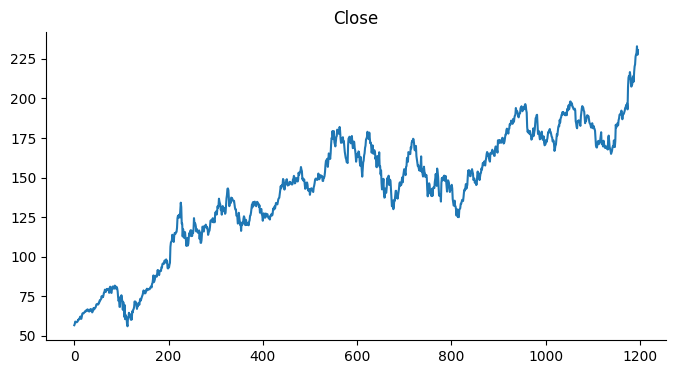

In [ ]:
# @title Close

from matplotlib import pyplot as plt
final_df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00375946],
       [0.00808424],
       [0.01673382],
       ...,
       [1.        ],
       [0.96941565],
       [0.98620591]])

In [ ]:
input_data.shape

(1197, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [ ]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1097, 100, 1)
(1097,)


In [ ]:
#making the predictions
y_predicted = model.predict(x_test)

35/35 [==============================] - 4s 86ms/step


In [ ]:

y_predicted.shape

(1097, 1)

In [ ]:
y_predicted

array([[0.1655493 ],
       [0.16308323],
       [0.1606268 ],
       ...,
       [0.8678744 ],
       [0.8794874 ],
       [0.8914676 ]], dtype=float32)

In [ ]:
scale_factor = 1/scaler.scale_

In [ ]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

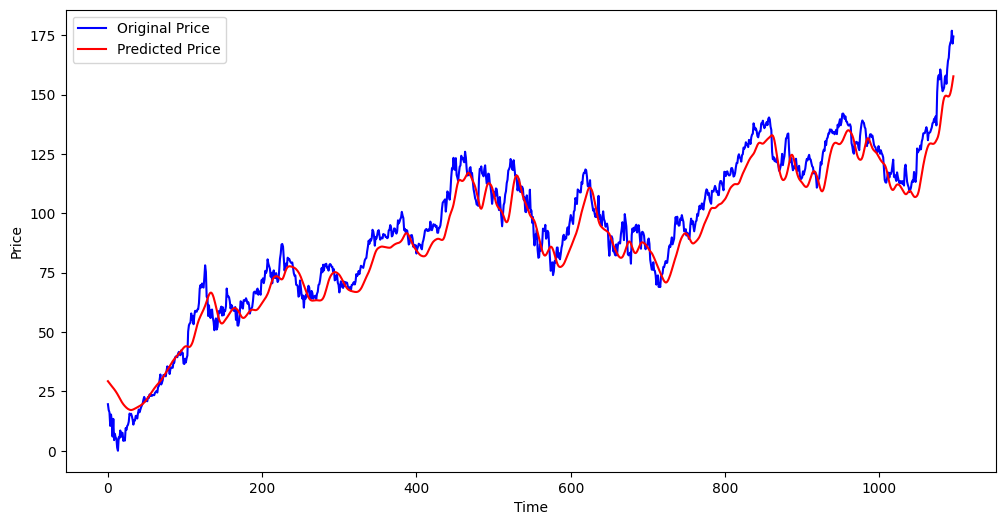

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label= 'Original Price')
plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()